In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Angles
import astropy.units as u
from astropy.visualization import simple_norm
from astropy.visualization import ZScaleInterval
from scipy.ndimage import gaussian_filter
from astropy.stats import mad_std
from astropy.stats import sigma_clipped_stats
# from photutils.aperture import CircularAperture
# from photutils.aperture import SkyCircularAperture
# from photutils.aperture import aperture_photometry
# import os
from astropy.table import Table
import matplotlib.ticker as ticker
from make_cuts import choosef, random_apers, get_names, radec_minmax, cuts

#from astroML.plotting import MultiAxes
from scipy.optimize import curve_fit

In [2]:
from matplotlib import rc                # Establece parámetros iniciales al grupo
rc('text', usetex=False)
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25
plt.rc('font', family='serif')
plt.rc('font', size=SMALL_SIZE)          # Controla tamaño de texto por defecto
plt.rc('axes', titlesize=BIGGER_SIZE)    # Tamaño de las fuentes de los títulos
# Tamaño de las fuentes de los ejes x e y
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)    # Tamaño de los tick en el eje x
plt.rc('ytick', labelsize=SMALL_SIZE)    # Tamaño de los tick en el eje y
plt.rc('legend', fontsize=SMALL_SIZE)    # Tamaño de las leyendas
# Tamaño de la fuente del título de la figura
plt.rc('figure', titlesize=BIGGER_SIZE)

In [3]:
df = Table.read('crossmatch_mag.fits')

In [4]:
print(len(df))

33271


In [5]:
mask = df['CLASS_STAR'] > 0.95
dfs = df[mask]

In [6]:
# NSF
mag_NB = dfs['MAG_AUTO']
mag_g = dfs['MAG_AUTO_g_1']
mag_r = dfs['MAG_AUTO_r_1']
mag_i = dfs['MAG_AUTO_i_1']
mag_z = dfs['MAG_AUTO_z_1']
mag_y = dfs['MAG_AUTO_y_1']

# NOAO
mag_ag = dfs['mag_auto_g_2']
mag_ar = dfs['mag_auto_r_2']
mag_ai = dfs['mag_auto_i_2']
mag_az = dfs['mag_auto_z_2']
mag_ay = dfs['mag_auto_y_2']


mag_nsf = [mag_g, mag_r, mag_i, mag_z, mag_y, mag_NB]
mag_noao = [mag_ag, mag_ar, mag_ai, mag_az, mag_ay, mag_az]
nombres = ['g', 'r', 'i', 'z', 'y', 'NB']

In [7]:
def func(x,a):
    return a

# G

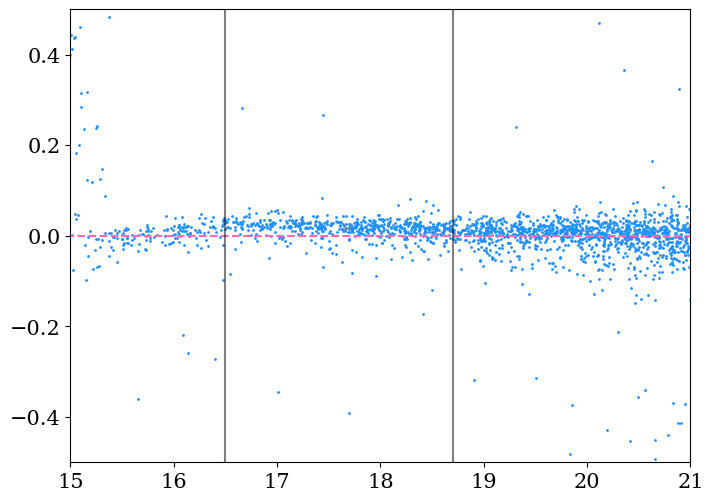

In [8]:
fig, ax= plt.subplots(figsize=(8,6),facecolor= 'w', dpi=100)

ax.scatter(mag_g,mag_ag-mag_g,c = 'dodgerblue', s=1)
ax.set_xlim(15,21)
ax.set_ylim(-0.5,0.5)
ax.hlines(0,14,22, linestyle = 'dashed', color ='hotpink')
ax.vlines(16.5,-2,2,alpha =0.5)
ax.vlines(18.7,-2,2,alpha =0.5)
plt.show()

In [9]:
fit_line = []


mask_g = (mag_g >= 16.5) & (mag_g <= 18.7) & (
    mag_ag-mag_g > -0.2) & (mag_ag-mag_g < 0.2)
g_dfs = dfs[mask_g]

magnsf_g = g_dfs['MAG_AUTO_g_1']
magnoao_g = g_dfs['mag_auto_g_2']
diff_g = magnoao_g-magnsf_g



popt_g, pcov = curve_fit(func, magnsf_g, diff_g)
fit_line.append(popt_g)
print(popt_g)

[0.01484103]


# R

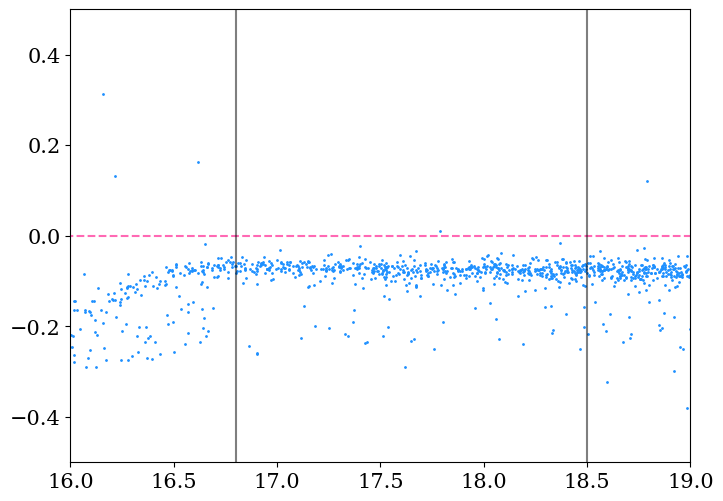

In [10]:
fig, ax= plt.subplots(figsize=(8,6),facecolor= 'w', dpi=100)

ax.scatter(mag_r,mag_ar-mag_r,c = 'dodgerblue', s=1)
ax.set_xlim(16,19)
ax.set_ylim(-0.5,0.5)
ax.hlines(0,14,22, linestyle = 'dashed', color ='hotpink')
ax.vlines(16.8,-2,2,alpha =0.5)
ax.vlines(18.5,-2,2,alpha =0.5)
plt.show()

In [11]:
mask_r = (mag_r >= 16.8) & (mag_r <= 18.5) & (
    mag_ar-mag_r > -0.2) & (mag_ar-mag_r < 0.2)
r_dfs = dfs[mask_r]

magnsf_r = r_dfs['MAG_AUTO_r_1']
magnoao_r = r_dfs['mag_auto_r_2']
diff_r = magnoao_r-magnsf_r



popt_r, pcov = curve_fit(func, magnsf_r, diff_r)
fit_line.append(popt_r)
print(popt_r)

[-0.07719921]


# I

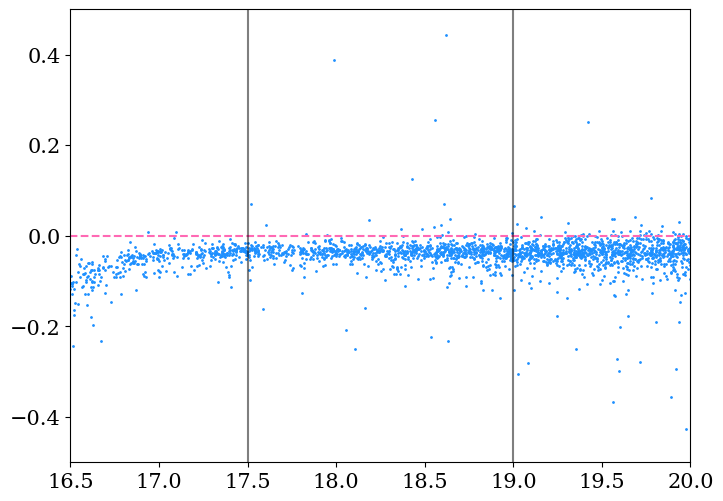

In [12]:
fig, ax= plt.subplots(figsize=(8,6),facecolor= 'w', dpi=100)

ax.scatter(mag_i,mag_ai-mag_i,c = 'dodgerblue', s=1)
ax.set_xlim(16.5,20)
ax.set_ylim(-0.5,0.5)
ax.hlines(0,14,22, linestyle = 'dashed', color ='hotpink')
ax.vlines(17.5,-2,2,alpha =0.5)
ax.vlines(19,-2,2,alpha =0.5)
plt.show()

In [13]:
mask_i = (mag_i >= 17.5) & (mag_i <= 19) & (
    mag_ai-mag_i > -0.2) & (mag_ai-mag_i < 0.2)
i_dfs = dfs[mask_i]

magnsf_i = i_dfs['MAG_AUTO_i_1']
magnoao_i = i_dfs['mag_auto_i_2']
diff_i = magnoao_i-magnsf_i



popt_i, pcov = curve_fit(func, magnsf_i, diff_i)
fit_line.append(popt_i)
print(popt_i)

[-0.0374649]


# Z

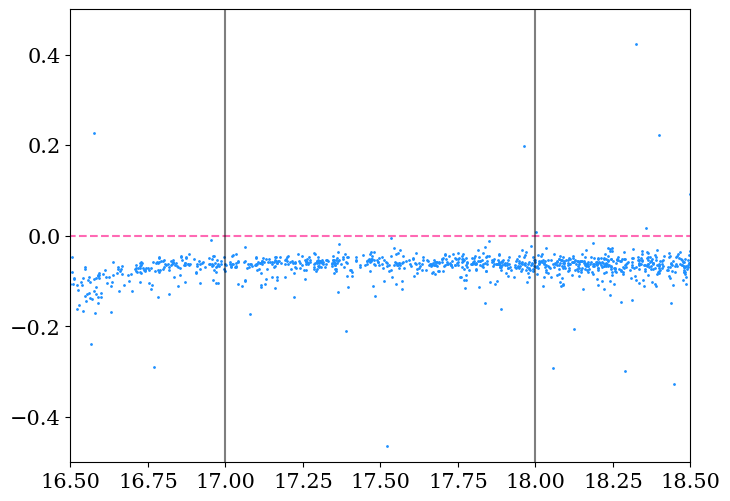

In [14]:
fig, ax= plt.subplots(figsize=(8,6),facecolor= 'w', dpi=100)

ax.scatter(mag_z,mag_az-mag_z,c = 'dodgerblue', s=1)
ax.set_xlim(16.5,18.5)
ax.set_ylim(-0.5,0.5)
ax.hlines(0,14,22, linestyle = 'dashed', color ='hotpink')
ax.vlines(17,-2,2,alpha =0.5)
ax.vlines(18,-2,2,alpha =0.5)
plt.show()

In [15]:
mask_z = (mag_z >= 16.5) & (mag_z <= 18.7) & (
    mag_az-mag_z > -0.2) & (mag_az-mag_z < 0.2)
z_dfs = dfs[mask_z]

magnsf_z = z_dfs['MAG_AUTO_z_1']
magnoao_z = z_dfs['mag_auto_z_2']
diff_z = magnoao_z-magnsf_z



popt_z, pcov = curve_fit(func, magnsf_z, diff_z)
fit_line.append(popt_z)
print(popt_z)

[-0.06660824]


# Y

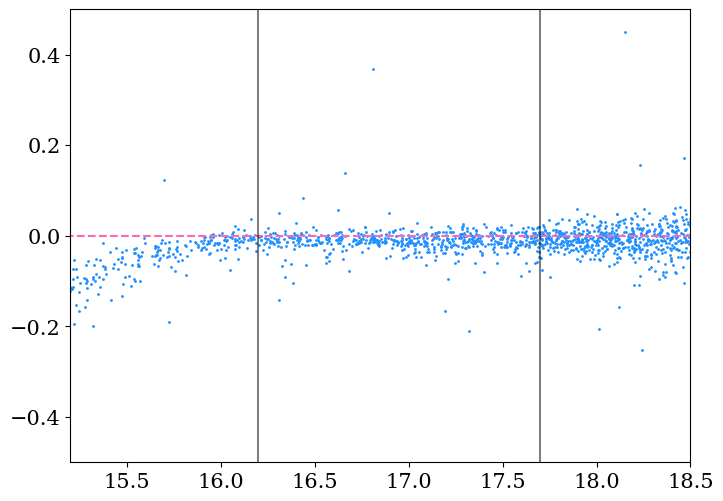

In [16]:
fig, ax= plt.subplots(figsize=(8,6),facecolor= 'w', dpi=100)

ax.scatter(mag_y,mag_ay-mag_y,c = 'dodgerblue', s=1)
ax.set_xlim(15.2,18.5)
ax.set_ylim(-0.5,0.5)
ax.hlines(0,14,22, linestyle = 'dashed', color ='hotpink')
ax.vlines(16.2,-2,2,alpha =0.5)
ax.vlines(17.7,-2,2,alpha =0.5)
plt.show()

In [17]:
mask_y = (mag_y >= 16.5) & (mag_y <= 18.7) & (
    mag_ay-mag_y > -0.2) & (mag_ay-mag_y < 0.2)
y_dfs = dfs[mask_y]

magnsf_y = y_dfs['MAG_AUTO_y_1']
magnoao_y = y_dfs['mag_auto_y_2']
diff_y = magnoao_y-magnsf_y



popt_y, pcov = curve_fit(func, magnsf_y, diff_y)
fit_line.append(popt_y)
print(popt_y)

[-0.00926503]


# NB

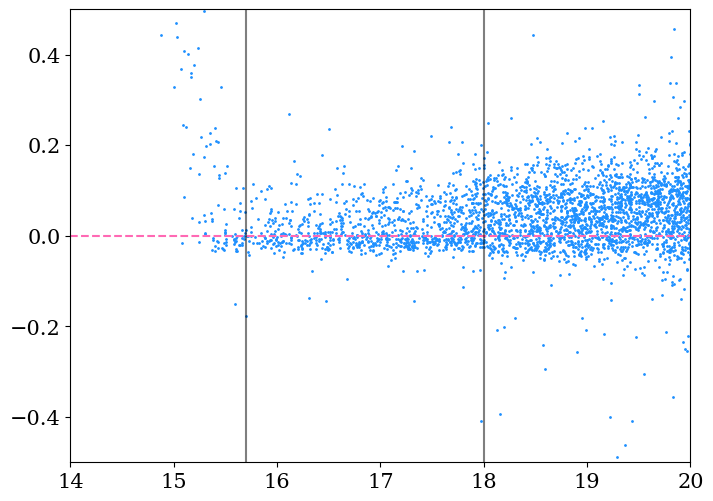

In [18]:
fig, ax= plt.subplots(figsize=(8,6),facecolor= 'w', dpi=100)

ax.scatter(mag_NB,mag_az-mag_NB,c = 'dodgerblue', s=1)
ax.set_xlim(14,20)
ax.set_ylim(-0.5,0.5)
ax.hlines(0,14,22, linestyle = 'dashed', color ='hotpink')
ax.vlines(15.7,-2,2,alpha =0.5)
ax.vlines(18,-2,2,alpha =0.5)
plt.show()

In [19]:
mask_NB = (mag_NB >= 15.7) & (mag_NB <= 18) & (
    mag_az-mag_NB > -0.1) & (mag_az-mag_NB < 0.1)
NB_dfs = dfs[mask_NB]

magnsf_NB = NB_dfs['MAG_AUTO']
magnoao_NB = NB_dfs['mag_auto_z_2']
diff_NB = magnoao_NB - magnsf_NB



popt_NB, pcov = curve_fit(func, magnsf_NB, diff_NB)
fit_line.append(popt_NB)
print(popt_NB)

[0.01317657]


In [20]:
# mask_NB_s = (mag_NB >= 15.7) & (mag_NB <= 18) & (
#     mag_az-mag_NB > 0) & (mag_az-mag_NB > 0.15)
# NB2_dfs = dfs[mask_NB_s]

# # magnsf_NB2 = NB2_dfs['MAG_AUTO']
# # magnoao_NB2 = NB2_dfs['mag_auto_z_2']
# # diff_NB = magnoao_NB2 - magnsf_NB2



# #popt_NB2, pcov = curve_fit(func, magnsf_NB, diff_NB)
# #fit_line.append(popt_NB)
# #print(popt_NB)

In [21]:
# fig, ax= plt.subplots(figsize=(8,6),facecolor= 'w', dpi=100)

# ax.scatter(NB2_dfs['MAG_AUTO'],NB2_dfs['mag_auto_z_2']-NB2_dfs['MAG_AUTO'],c = 'dodgerblue', s=1)
# ax.set_xlim(14,20)
# ax.set_ylim(-0.5,0.5)
# ax.hlines(0,14,22, linestyle = 'dashed', color ='hotpink')
# ax.vlines(15.7,-2,2,alpha =0.5)
# ax.vlines(18,-2,2,alpha =0.5)
# plt.show()

In [22]:
# mask_NB_s2 = (mag_NB >= 18) & (mag_NB <= 20) & (
#     mag_az-mag_NB > (-0.4)) & (mag_az-mag_NB < -0.2)
# NB2_dfs2 = dfs[mask_NB_s2]

In [23]:
# fig, ax= plt.subplots(figsize=(8,6),facecolor= 'w', dpi=100)

# ax.scatter(NB2_dfs2['MAG_AUTO'],NB2_dfs2['mag_auto_z_2']-NB2_dfs2['MAG_AUTO'],c = 'dodgerblue', s=1)
# ax.set_xlim(14,20)
# ax.set_ylim(-0.5,0.5)
# ax.hlines(0,14,22, linestyle = 'dashed', color ='hotpink')
# ax.vlines(15.7,-2,2,alpha =0.5)
# ax.vlines(18,-2,2,alpha =0.5)
# plt.show()

In [24]:
# sigmac =0.8678708899443127
# xs = np.linspace(0,80,80)

# NSF_NB = fits.open('Fields/nsf_nb964_sci.fits')
# data_NB = NSF_NB[1].data
# hdr_NB = NSF_NB[1].header

# RA_t = NB2_dfs['ALPHA_J2000']
# DEC_t = NB2_dfs['DELTA_J2000']

# #radius = [3.5,5.5,7.5,11.5,13.5,15.5,17.5,19.5,21.5,23.5,25.5,27.5]

# m_wcs = WCS(hdr_NB)
# for i in range(len(RA_t)):
#     c = SkyCoord(RA_t[i], DEC_t[i], frame=FK5, unit="deg")
#        #print(c)
#     recorte = Cutout2D(data_NB, c, (80, 80), wcs=m_wcs)
#     im = (recorte.data)

#     fig, axes = plt.subplots(1, 1, figsize=(10, 10))
#     axes.imshow(im, origin='lower', interpolation='nearest',
#                   cmap='Greys', vmin=-1*sigmac, vmax=3*sigmac)
# #     for n, radi in enumerate(radius):
# #         cc =plt.Circle(((len(recorte.data)/2),(len(recorte.data)/2)), radius=radi, fill = False, color = 'r')
# #         axes.add_artist( cc )
        
# #     plt.plot(xs, recorte.data[39]/10)
# #     #plt.title(str(i))
#     plt.axis('off')

In [25]:
# RA_t2 = NB2_dfs2['ALPHA_J2000']
# DEC_t2 = NB2_dfs2['DELTA_J2000']

# #radius = [3.5,5.5,7.5,11.5,13.5,15.5,17.5,19.5,21.5,23.5,25.5,27.5]

# m_wcs = WCS(hdr_NB)
# for i in range(len(RA_t2)):
#     c = SkyCoord(RA_t2[i], DEC_t2[i], frame=FK5, unit="deg")
#        #print(c)
#     recorte = Cutout2D(data_NB, c, (80, 80), wcs=m_wcs)
#     im = (recorte.data)

#     fig, axes = plt.subplots(1, 1, figsize=(10, 10))
#     axes.imshow(im, origin='lower', interpolation='nearest',
#                   cmap='Greys', vmin=-1*sigmac, vmax=3*sigmac)
# #     for n, radi in enumerate(radius):
# #         cc =plt.Circle(((len(recorte.data)/2),(len(recorte.data)/2)), radius=radi, fill = False, color = 'r')
# #         axes.add_artist( cc )
        
# #     plt.plot(xs, recorte.data[39]/10)
# #     #plt.title(str(i))
#     plt.axis('off')

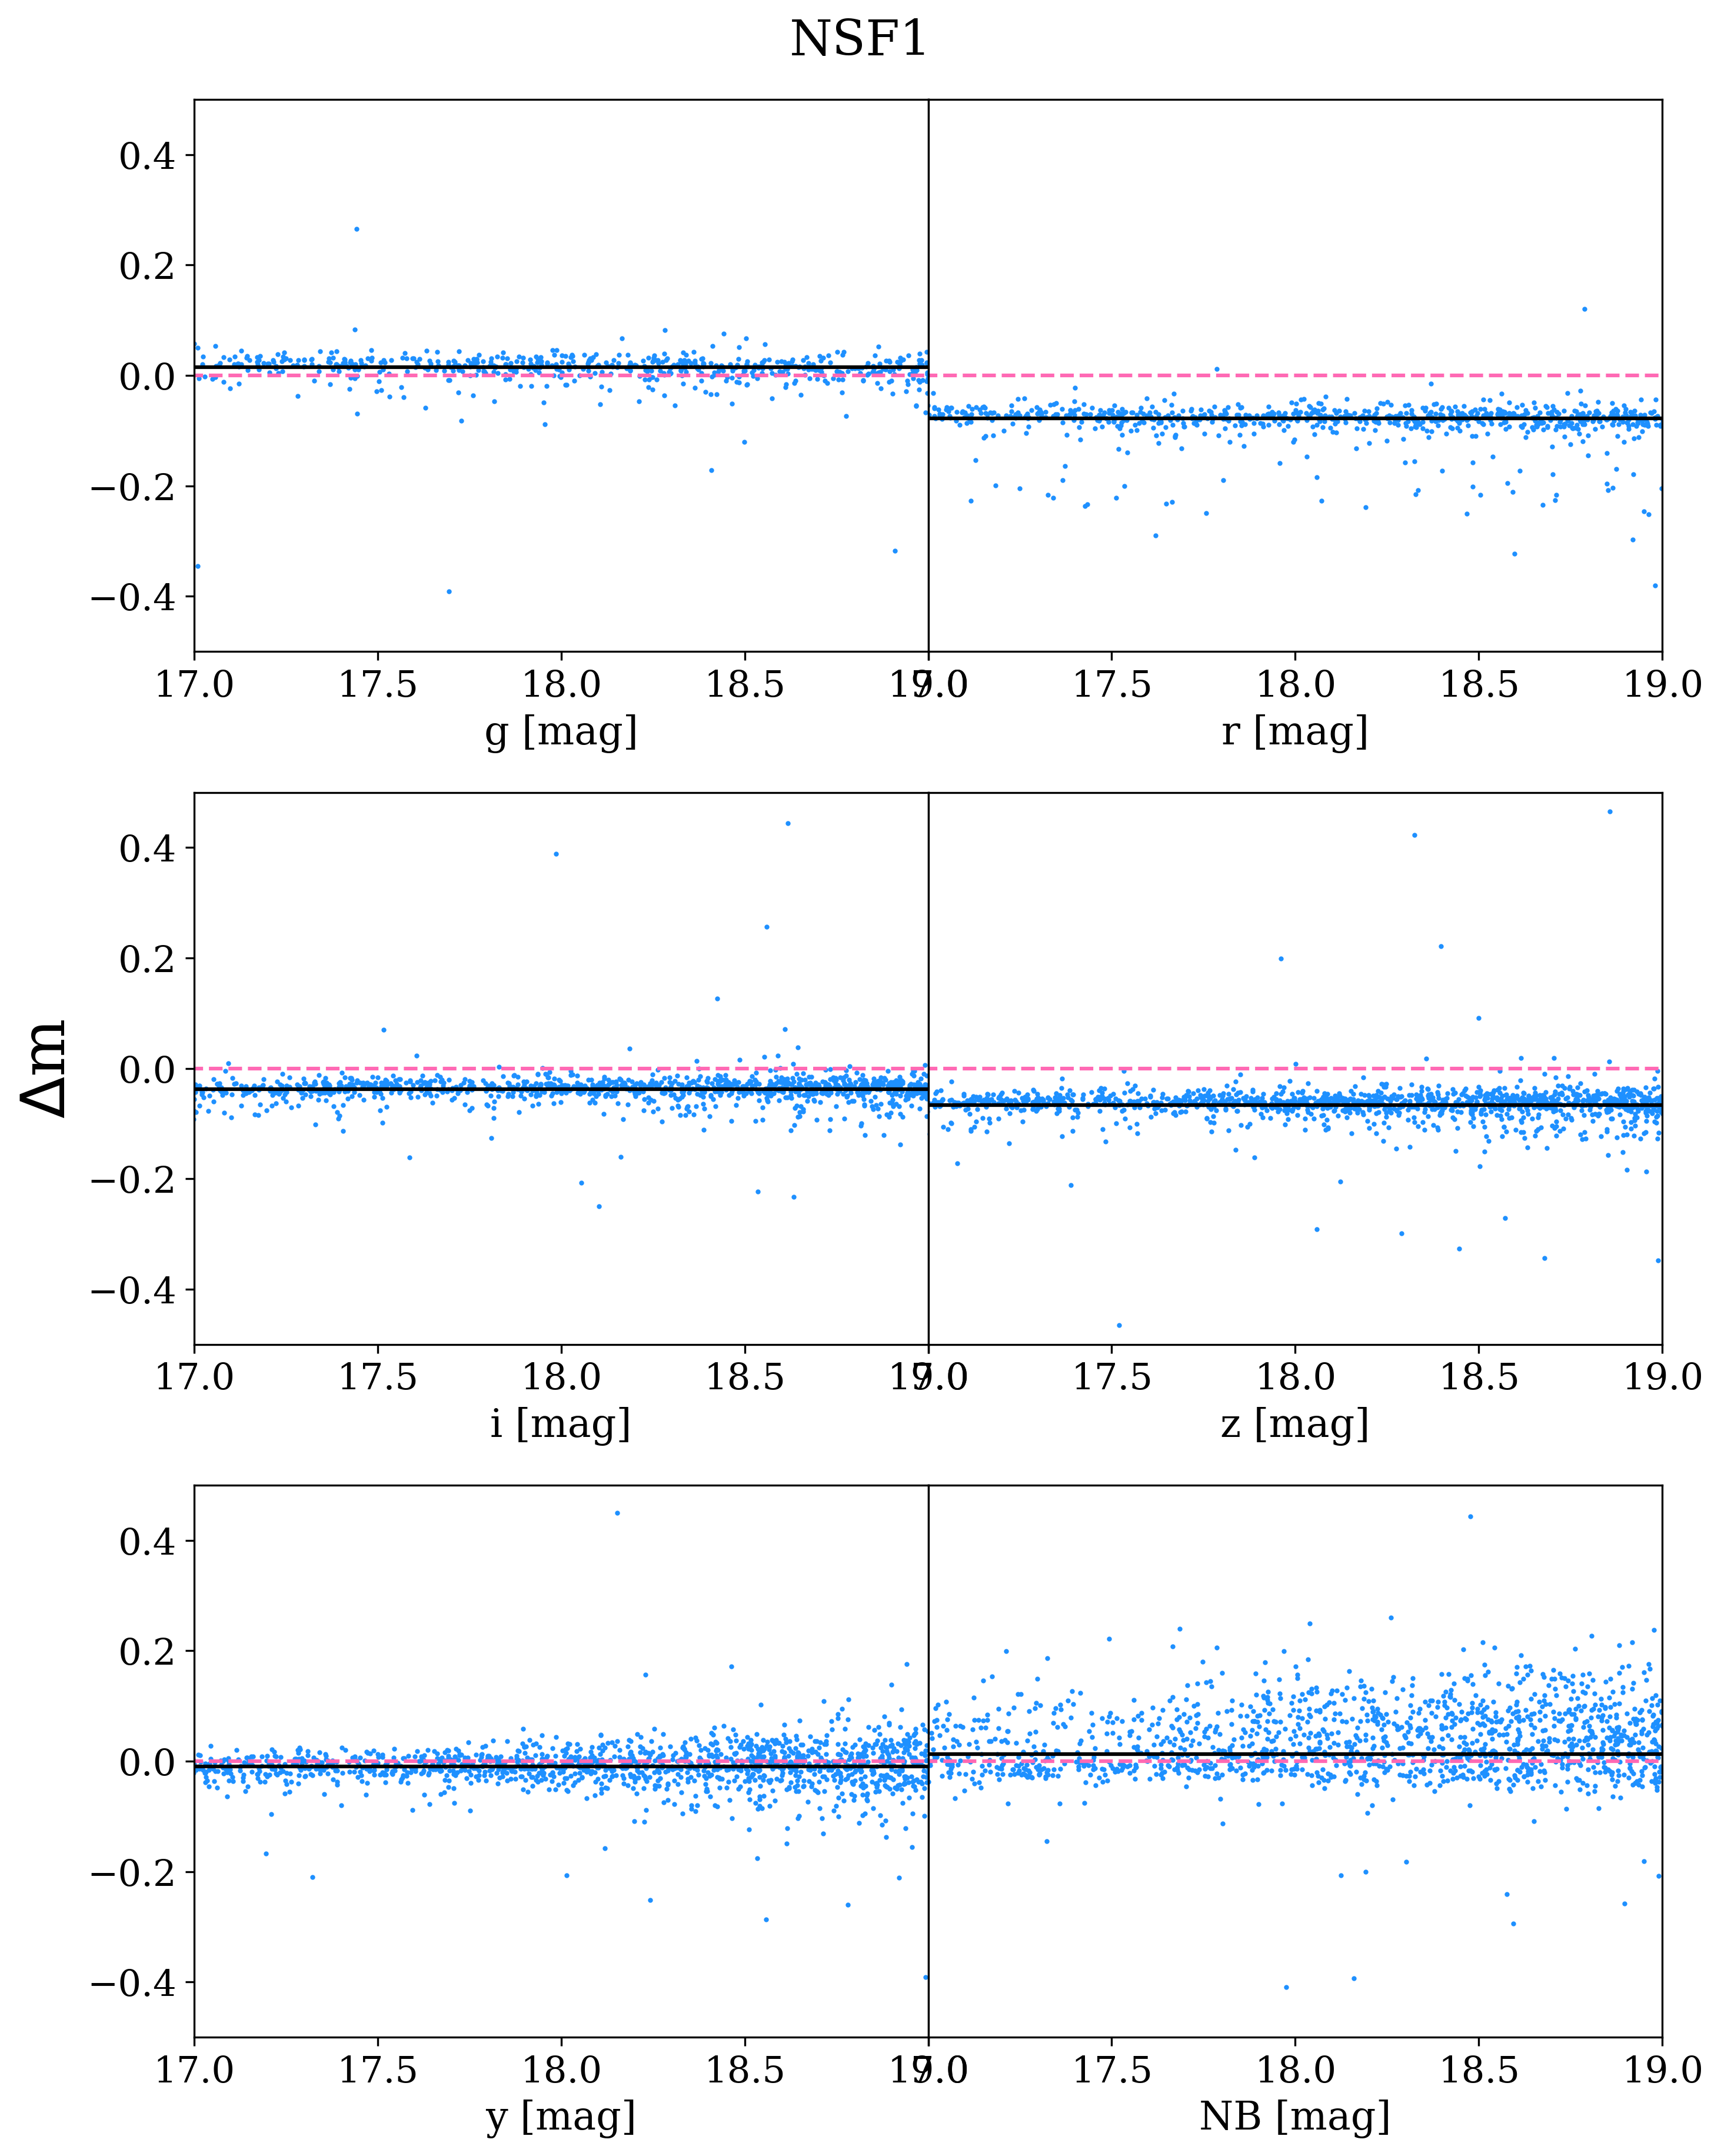

In [26]:
fig,ax=plt.subplots(ncols =2, nrows =3,figsize=(10,12),facecolor= 'w', dpi=300)

for i, mag in enumerate(mag_nsf):
    #mask = mag < 40
    ax[i//2][i-2*(i//2)].scatter(mag_nsf[i],mag_noao[i]-mag_nsf[i], color = 'dodgerblue', s= 1)
    #ax.hist(np.log10(dist_star), bins = 20 , color = 'mediumslateblue',  label = 'Estrellas', ec = 'white')
    #ax[i//2][i-2*(i//2)].set_title(nombres[i], size = 16)
    ax[i//2][i-2*(i//2)].set_xlabel(f'{nombres[i]} [mag]', size = 16)
    ax[i//2][i-2*(i//2)].hlines(fit_line[i],12,26)
    ax[1][0].set_ylabel(r'$\Delta$m', size = 25)
    ax[i//2][i-2*(i//2)].set_xlim(17,19)
    ax[i//2][i-2*(i//2)].set_ylim(-0.5,0.5)
    ax[i//2][i-2*(i//2)].hlines(0,0,100, linestyles = 'dashed', color = 'hotpink')
    if i in [1,3,5]:
        ax[i//2][i-2*(i//2)].set_yticks([])
        ax[i//2][i-2*(i//2)].set_ylabel('')
        
#     if i in [0,1,2]:
#         ax[i//2][i-2*(i//2)].set_xticks([])
#         ax[i//2][i-2*(i//2)].set_xlabel('')
    #ax.grid(True, ls = ':')
    #ax[i//2][i-2*(i//2)].legend(fontsize = 15, loc=2)
    #ax[2,1].set_axis_off()
    

fig.tight_layout()    
plt.subplots_adjust(wspace=0)
plt.suptitle('NSF1', fontsize = 20, y = 1.02)
plt.show()

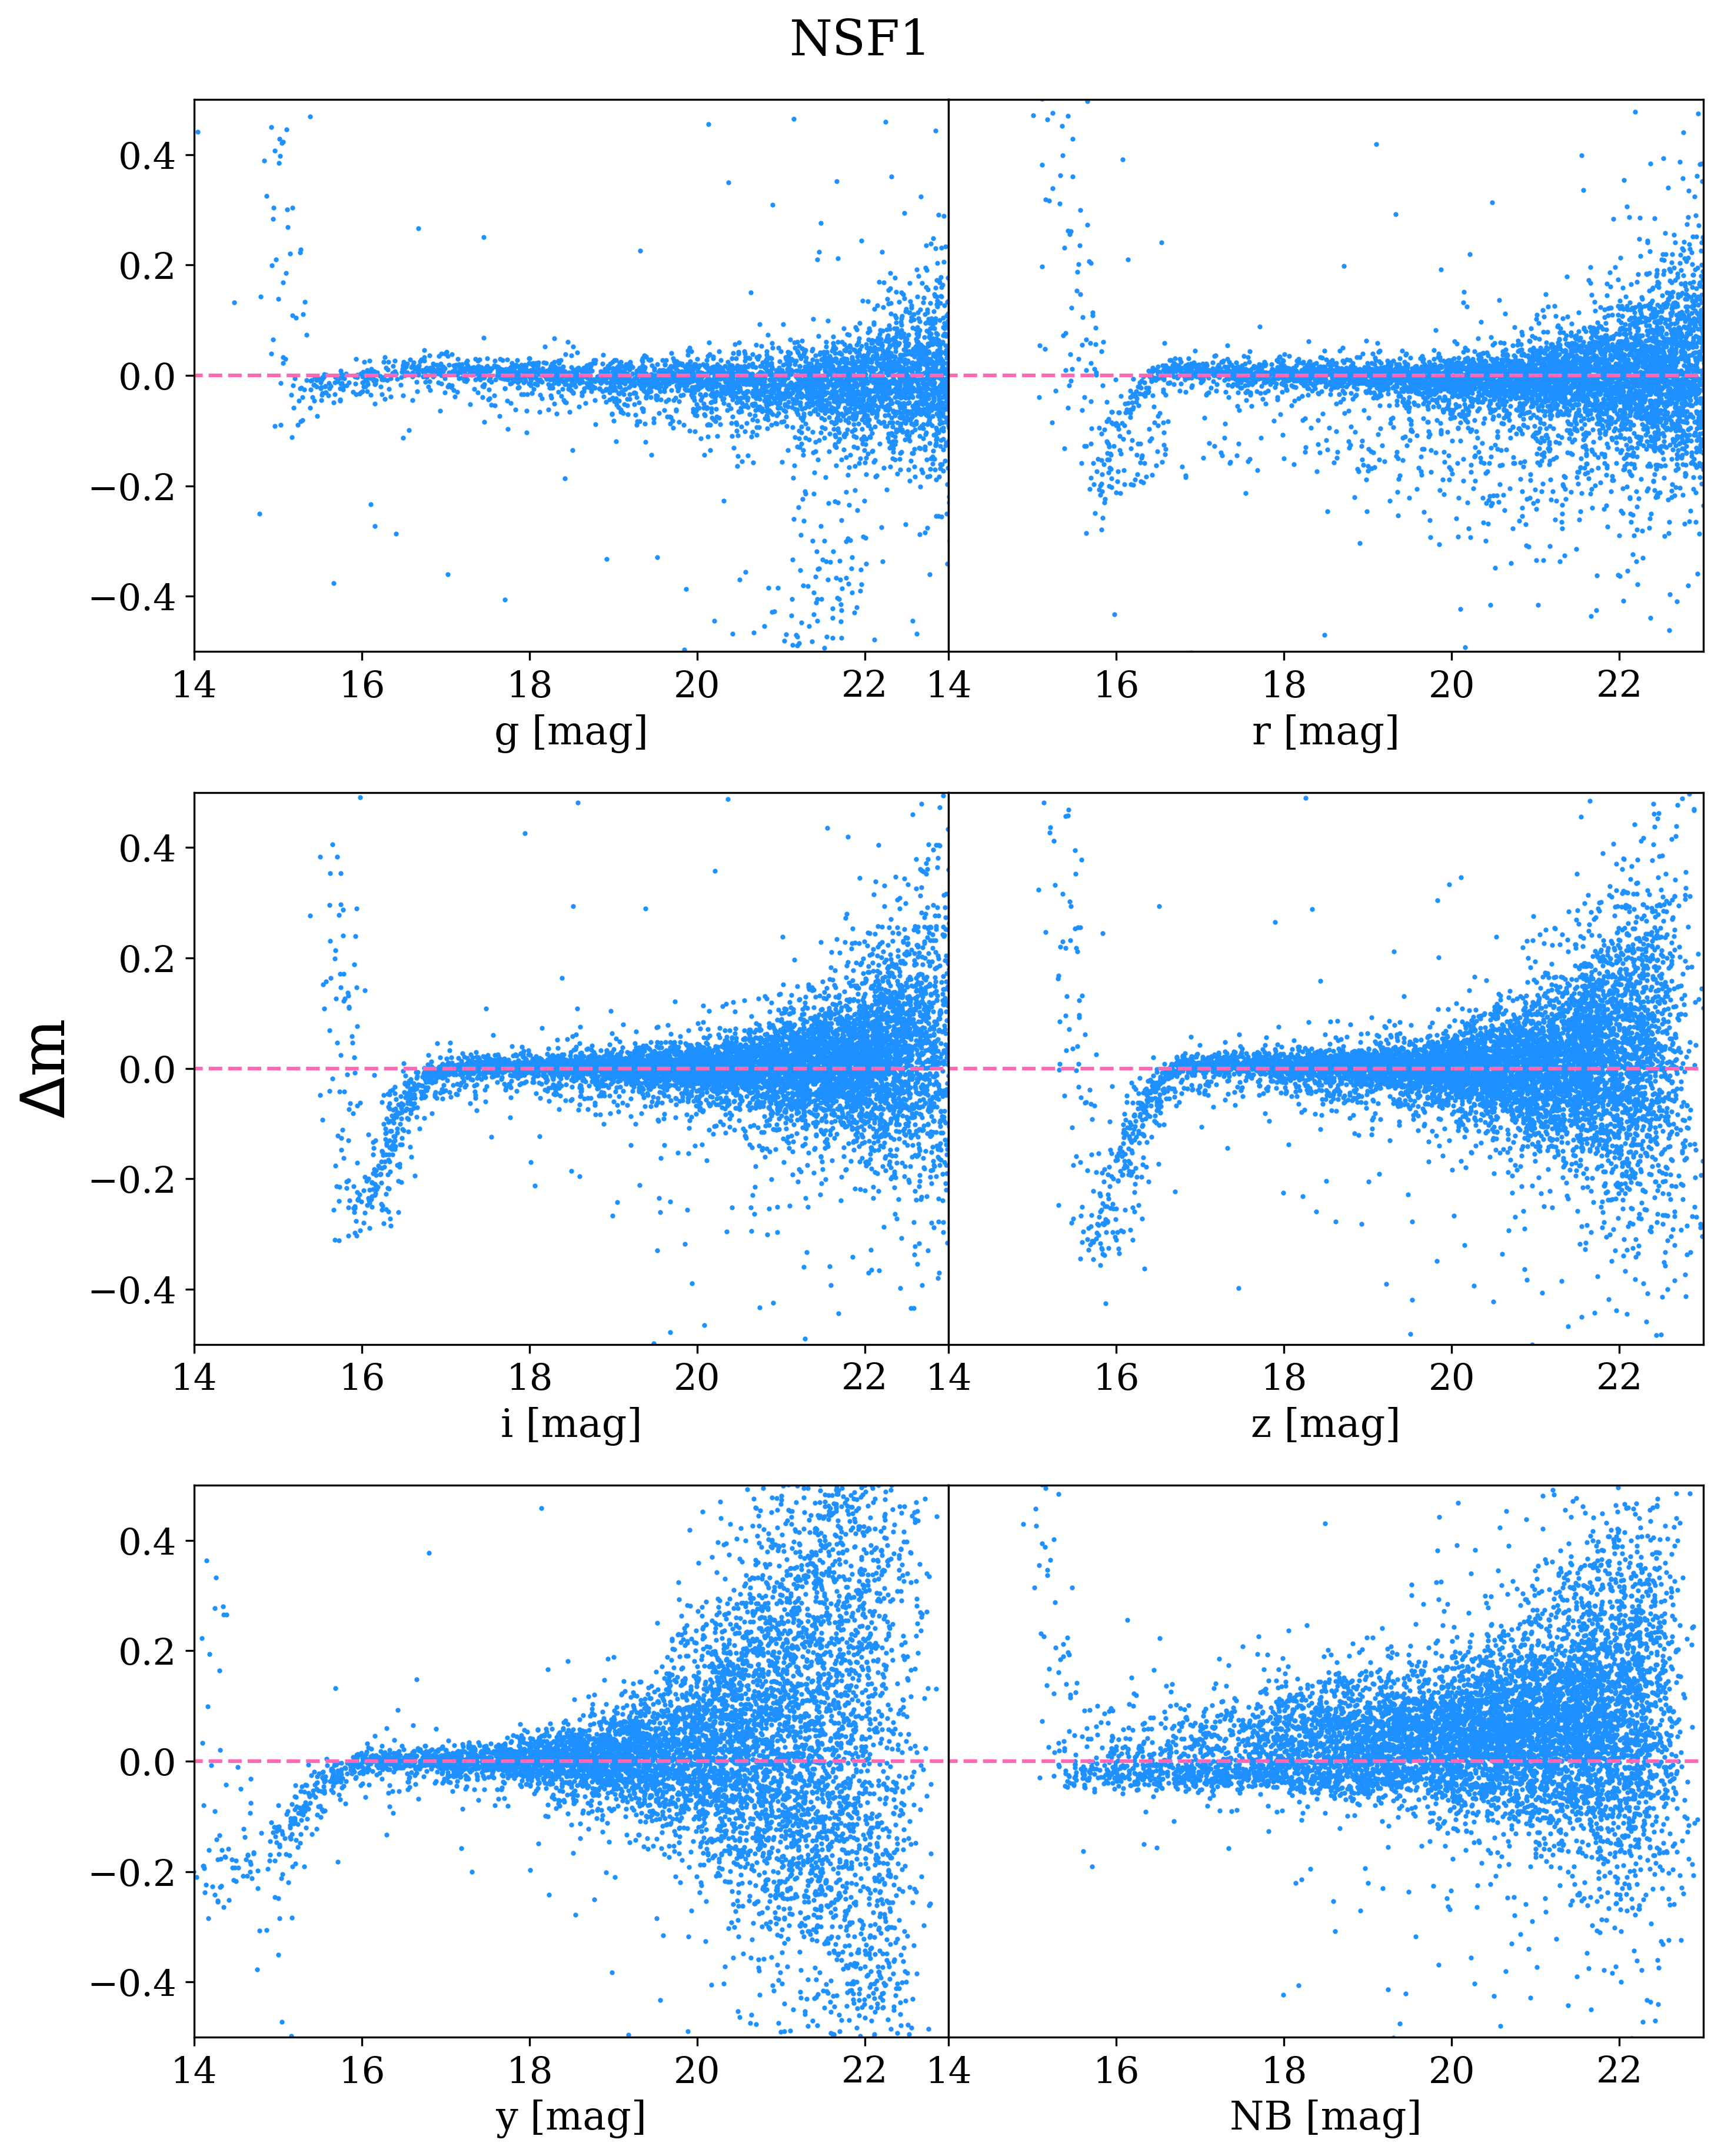

In [27]:
fig,ax=plt.subplots(ncols =2, nrows =3,figsize=(10,12),facecolor= 'w', dpi=300)

for i, mag in enumerate(mag_nsf):
    #mask = mag < 40
    ax[i//2][i-2*(i//2)].scatter(mag_nsf[i]+fit_line[i],mag_noao[i]-(mag_nsf[i]+fit_line[i]), color = 'dodgerblue', s= 1)
    #ax.hist(np.log10(dist_star), bins = 20 , color = 'mediumslateblue',  label = 'Estrellas', ec = 'white')
    #ax[i//2][i-2*(i//2)].set_title(nombres[i], size = 16)
    ax[i//2][i-2*(i//2)].set_xlabel(f'{nombres[i]} [mag]', size = 16)
    #ax[i//2][i-2*(i//2)].hlines(fit_line[i],12,26)
    ax[1][0].set_ylabel(r'$\Delta$m', size = 25)
    ax[i//2][i-2*(i//2)].set_xlim(14,23)
    ax[i//2][i-2*(i//2)].set_ylim(-0.5,0.5)
    ax[i//2][i-2*(i//2)].hlines(0,0,100, linestyles = 'dashed', color = 'hotpink')
    if i in [1,3,5]:
        ax[i//2][i-2*(i//2)].set_yticks([])
        ax[i//2][i-2*(i//2)].set_ylabel('')
        
#     if i in [0,1,2]:
#         ax[i//2][i-2*(i//2)].set_xticks([])
#         ax[i//2][i-2*(i//2)].set_xlabel('')
    #ax.grid(True, ls = ':')
    #ax[i//2][i-2*(i//2)].legend(fontsize = 15, loc=2)
    #ax[2,1].set_axis_off()
    

fig.tight_layout()    
plt.subplots_adjust(wspace=0)
plt.suptitle('NSF1', fontsize = 20, y = 1.02)
plt.show()


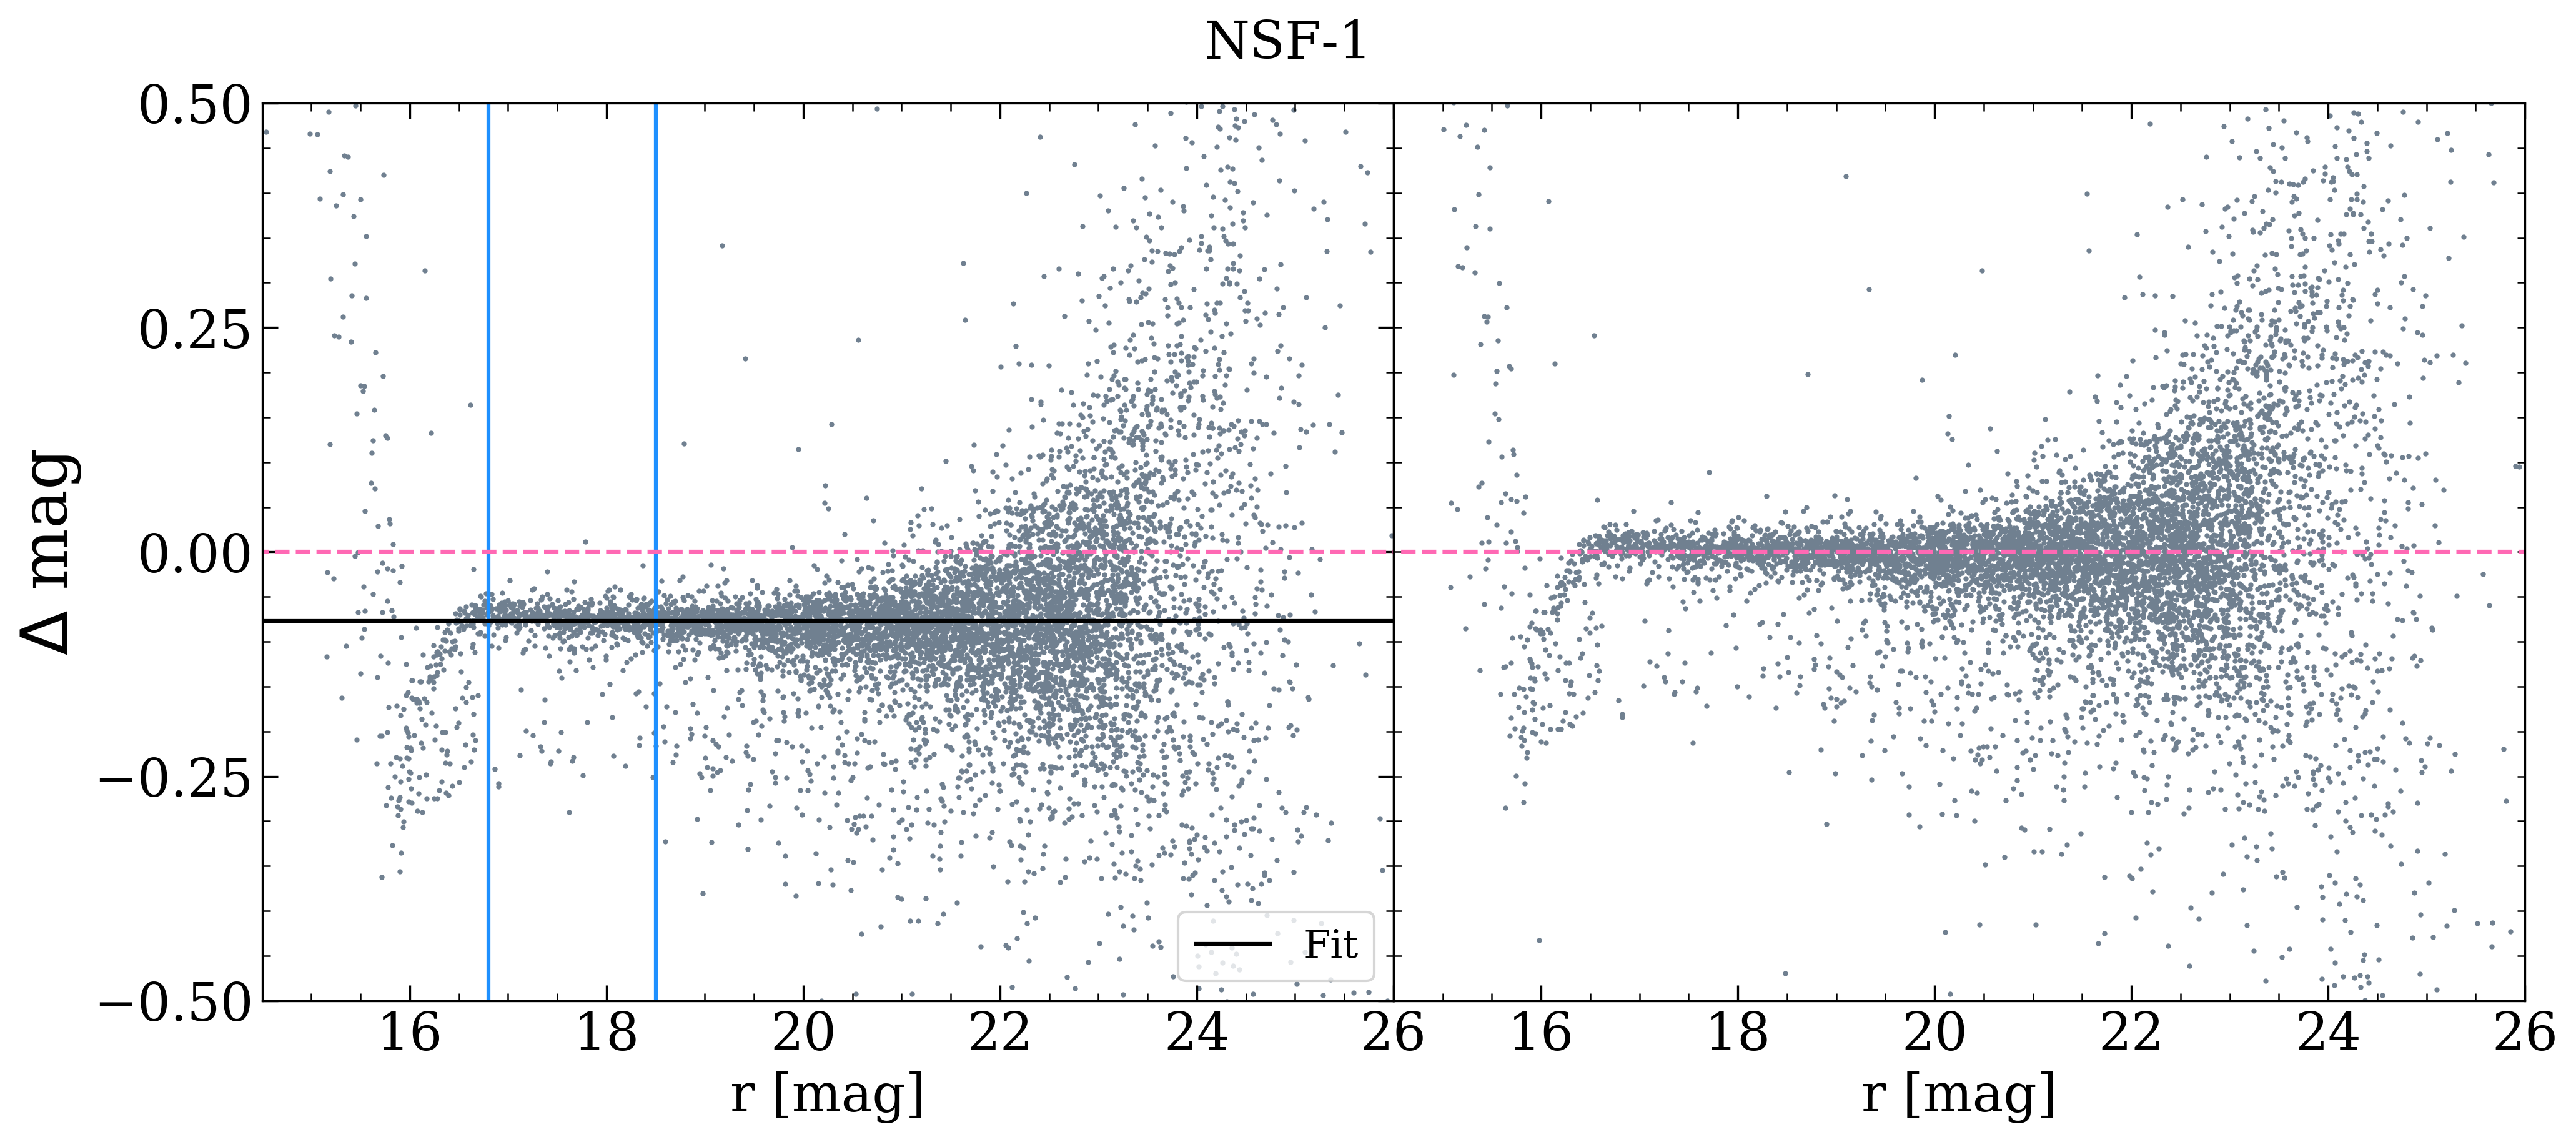

In [28]:
fig,ax=plt.subplots(ncols =2, nrows =1, figsize=(14,6),facecolor= 'w', dpi=300)

ax[0].scatter(mag_nsf[1],mag_noao[1]-(mag_nsf[1]), s = 1, color = 'slategray')
ax[1].scatter(mag_nsf[1]+fit_line[1],mag_noao[1]-(mag_nsf[1]+fit_line[1]), s  = 1, color = 'slategray')

ax[0].set_xlim(14.5,26)
ax[0].set_ylim(-0.5,0.5)

ax[0].vlines(16.8,-2,2,alpha =1, color = 'dodgerblue')
ax[0].vlines(18.5,-2,2,alpha =1, color = 'dodgerblue')
ax[0].hlines(fit_line[1],12,26, label = 'Fit')
ax[0].hlines(0,14,26, linestyle = 'dashed', color ='hotpink')
ax[1].hlines(0,11,27, linestyle = 'dashed', color ='hotpink')
# ax[0].vlines(16.8,-2,2,alpha =0.8, color = 'k', ls = '--')
# ax[0].vlines(18.5,-2,2,alpha =0.8, color = 'k', ls = '--')


ax[1].set_yticks([])
ax[1].set_ylabel('')

ax[0].set_xlabel(f'{nombres[1]} [mag]')
ax[0].set_ylabel(r'$\Delta$ mag', size = 25)

ax[1].set_xlabel(f'{nombres[1]} [mag]')

ax[1].set_xlim(14.5,26)
ax[1].set_ylim(-0.5,0.5)



ax[0].xaxis.set_major_locator(ticker.MultipleLocator(2))      # Ticks principales cada 1 unidades en el eje x
ax[0].xaxis.set_minor_locator(ticker.MultipleLocator(0.5))    # Ticks secundarios cada 0.1 unidades en el eje x
ax[0].yaxis.set_major_locator(ticker.MultipleLocator(0.25))      # Ticks principales cada 1 unidades en el eje y
ax[0].yaxis.set_minor_locator(ticker.MultipleLocator(0.05))    # Ticks secundarios cada 0.5 unidades en el eje y
ax[0].tick_params(axis='x', which='both', bottom=True, top=True, direction='in', length=6)   # Ticks en el eje x en la parte inferior y superior
ax[0].tick_params(axis='x', which='minor', bottom=True, top=True, direction='in', length=3)
ax[0].tick_params(axis='y', which='both', left=True, right=True, direction='in', length=6)   # Ticks en el eje y en el lado izquierdo y derecho
ax[0].tick_params(axis='y', which='minor', bottom=True, top=True, direction='in', length=3)

ax[1].xaxis.set_major_locator(ticker.MultipleLocator(2))      # Ticks principales cada 1 unidades en el eje x
ax[1].xaxis.set_minor_locator(ticker.MultipleLocator(0.5))    # Ticks secundarios cada 0.1 unidades en el eje x
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(0.25))      # Ticks principales cada 1 unidades en el eje y
ax[1].yaxis.set_minor_locator(ticker.MultipleLocator(0.05))    # Ticks secundarios cada 0.5 unidades en el eje y
ax[1].tick_params(axis='x', which='both', bottom=True, top=True, direction='in', length=6)   # Ticks en el eje x en la parte inferior y superior
ax[1].tick_params(axis='x', which='minor', bottom=True, top=True, direction='in', length=3)
ax[1].tick_params(axis='y', which='both', left=True, right=True, direction='in', length=6)   # Ticks en el eje y en el lado izquierdo y derecho
ax[1].tick_params(axis='y', which='minor', bottom=True, top=True, direction='in', length=3)

ax[0].tick_params(direction = 'in', colors = 'k', labelsize = 20)
ax[1].tick_params(direction = 'in', colors = 'k', labelsize = 20)
ax[1].set_yticks([])
ax[1].set_ylabel('')

ax[0].legend(loc = 4)
fig.tight_layout()    
plt.subplots_adjust(wspace=0)
plt.suptitle('NSF-1', fontsize = 20, y = 1.02)
plt.show()

In [29]:
data = Table.read('NSF_catalog.fits')

In [30]:
len(data)

448948

In [31]:
key_cat = ['MAG_AUTO_g', 'MAG_AUTO_r', 'MAG_AUTO_i',
           'MAG_AUTO_z', 'MAG_AUTO_y', 'MAG_AUTO']
key_cat_b = ['MAG_APER_g', 'MAG_APER_r', 'MAG_APER_i',
             'MAG_APER_z', 'MAG_APER_y', 'MAG_APER']
for i in range(len(fit_line)):
    data[key_cat[i]] = data[key_cat[i]] + fit_line[i]
    data[key_cat_b[i]] = data[key_cat_b[i]] + fit_line[i]

In [32]:
data.write('NSF_cat.fits', format='fits', overwrite = 'True')

In [33]:
aper = 2
BB = np.array([data['MAG_APER_z'][i][aper] for i in range(len(data))])


NB = np.array([data['MAG_APER'][i][aper] for i in range(len(data))])

In [34]:
# %%time

# sigma_c = []
# color_NBz = BB - NB 

# Z =[[mag,color] for mag, color in sorted(zip(NB, color_NBz), key=lambda pair: pair[0])]
# numb = 500
# mags, colors = list(map(list, zip(*Z)))
# for i, color in enumerate(colors[:-numb]):    
#     sect_col = colors[i:numb+i] 
#     s_c = sigma_clipped_stats(sect_col, sigma=3, cenfunc ='median')#, ‘mean’})
#     sigma_c.append(3*s_c[2])

In [35]:
# from scipy.interpolate import make_interp_spline, BSpline



# #define x as 200 equally spaced values between the min and max of original x 
# xnew = np.linspace(np.min(mags[:-numb]), np.max(mags[:-numb]), 200) 

# #define spline
# spl = make_interp_spline(mags[:-numb], sigma_c, k=3)
# y_smooth = spl(xnew)

In [36]:
# fig, ax= plt.subplots(figsize=(8,6),facecolor= 'w', dpi=100)

# ax.plot(fp, a)

# # ax.set_xlim(16,23)
# # ax.set_ylim(-0.5,1.5)
# ax.hlines(0,14,24, linestyle = 'dashed', color ='hotpink')

# plt.show()

In [37]:
# fig, ax= plt.subplots(figsize=(8,6),facecolor= 'w', dpi=100)

# ax.scatter(BB-Y,BB-NB,c = 'dodgerblue', s=1)
# #ax.plot(mags[:-numb], sigma_c, color = 'crimson')
# #ax.plot(fp, a)

# ax.set_xlim(-10,10)
# ax.set_ylim(-3,5)
# #ax.hlines(0,14,28, linestyle = 'dashed', color ='hotpink')
# ax.hlines(0.25,-10,10)

# plt.show()

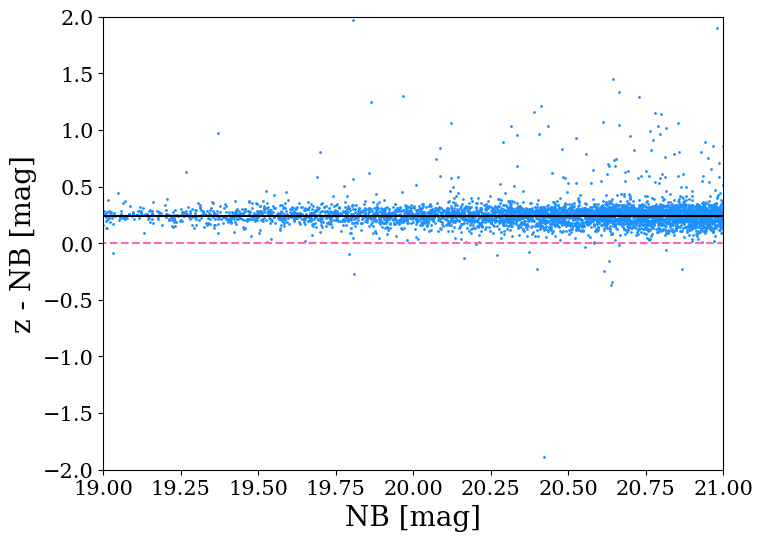

In [38]:
fig, ax= plt.subplots(figsize=(8,6),facecolor= 'w', dpi=100)

ax.scatter(NB,BB-NB,c = 'dodgerblue', s=1)
#ax.plot(mags[:-numb], sigma_c, color = 'crimson')
#ax.plot(fp, a)

ax.set_xlim(19,21)
ax.set_ylim(-2,2)
ax.set_xlabel('NB [mag]')
ax.set_ylabel('z - NB [mag]')
ax.hlines(0,14,28, linestyle = 'dashed', color ='hotpink')
ax.hlines(0.24404659,14,28)

plt.show()

In [39]:
mask_cont = (NB >= 19) & (NB <= 21) & (
    BB-NB > 0) & (BB-NB < 0.5)
cont_dfs = data[mask_cont]

magNB_cont = np.array([cont_dfs['MAG_APER'][i][aper] for i in range(len(cont_dfs))])

magBB_cont = np.array([cont_dfs['MAG_APER_z'][i][aper] for i in range(len(cont_dfs))])

diff_cont = magBB_cont-magNB_cont

ew_end = 0.44

NB_5s = 24.98

popt_new, pcov = curve_fit(func, NB, diff_cont)
print(popt_new)

[0.24237648]


In [40]:
#data['MAG_APER'] = data['MAG_APER'] + popt_new

data['MAG_APER'] = data['MAG_APER'] + popt_new
#NB_corr = (NB+popt_new)
NB_corr = np.array([data['MAG_APER'][i][aper] for i in range(len(data))])

#NB_corr = np.array([data['MAG_APER'][i][aper] for i in range(len(data))]) + popt_new

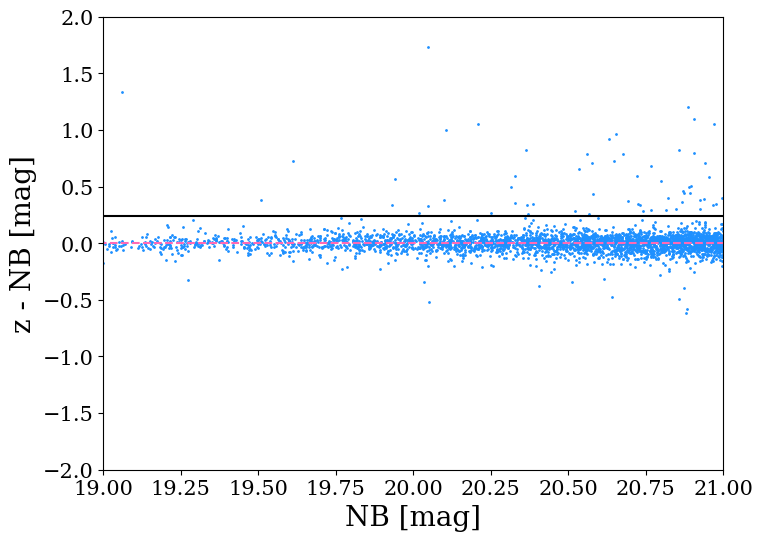

In [41]:
fig, ax= plt.subplots(figsize=(8,6),facecolor= 'w', dpi=100)

ax.scatter(NB_corr,BB-NB_corr,c = 'dodgerblue', s=1)
#ax.plot(mags[:-numb], sigma_c, color = 'crimson')
#ax.plot(fp, a)

ax.set_xlim(19,21)
ax.set_ylim(-2,2)
ax.set_xlabel('NB [mag]')
ax.set_ylabel('z - NB [mag]')
ax.hlines(0,14,28, linestyle = 'dashed', color ='hotpink')
ax.hlines(0.24404659,14,28)

plt.show()

In [42]:
# ZP = 32.37

# sig_BB = np.array([data['FLUXERR_APER_z'][i][aper] for i in range(len(data))])


# sig_NB = np.array([data['FLUXERR_APER'][i][aper] for i in range(len(data))])

# sig_BB = np.array([data['MAGERR_APER_z'][i][aper] for i in range(len(data))])


# sig_NB = np.array([data['MAGERR_APER'][i][aper] for i in range(len(data))])



In [43]:
# def color_criteria(BB,NB, ZP, sig_BB, sig_NB):
#     #mask = (sig_BB < 50 ) & ( sig_NB < 50) & ( sig_NB > 0) & ( sig_BB > 0)
#     cc = (1 - 10**(-0.4*(BB-NB)))/(10**(-0.4*(ZP-NB)) * np.sqrt(sig_BB**2 + sig_NB**2))
#     return cc

In [44]:
#cc_crit = color_criteria(BB,NB_corr,ZP,sig_BB, sig_NB)#

In [45]:
# mask_cc = np.around(cc_crit,1) > 3

In [46]:
# plt.hist(BB, bins=100)
# plt.xlim(0,40)
# plt.show()

# plt.hist(NB, bins=100)
# plt.xlim(0,40)
# plt.show()

# plt.hist(sig_BB, bins=100)
# #plt.xlim(0,40)
# plt.show()

# plt.hist(sig_NB, bins=100)
# #plt.xlim(0,100)
# plt.show()

In [47]:
# c_crit = cc_crit[mask_cc]
# c_crit

In [48]:
# %%time

# sigma_c = []
# color_NBz = BB - NB_corr 

# Z =[[mag,color] for mag, color in sorted(zip(NB_corr, color_NBz), key=lambda pair: pair[0])]
# numb = 500
# mags, colors = list(map(list, zip(*Z)))
# for i, color in enumerate(colors[:-numb]):    
#     sect_col = colors[i:numb+i] 
#     s_c = sigma_clipped_stats(sect_col, sigma=3, cenfunc ='median')#, ‘mean’})
#     sigma_c.append(3*s_c[2])

In [49]:
%%time

sig_clip = []
numbers = np.arange(np.min(NB_corr), np.max(NB_corr), 0.125)
# print(numbers)
for i, n in enumerate(numbers):
    # print(n)
    mask = (NB_corr >= n) & (NB_corr < n+0.125)
    BB_a = BB[mask]
    NB_a = NB_corr[mask]
    sig_c = sigma_clipped_stats((BB_a - NB_a), sigma=3, cenfunc='median')
    sig_clip.append(3*sig_c[2])
    # print(3*sig_c[2])

CPU times: user 859 ms, sys: 0 ns, total: 859 ms
Wall time: 858 ms


In [50]:
# %%time

# cs_crit = []
# numbers = np.arange(17, 27, 0.125)
# for i in numbers:
#     mask = (NB >= i) & (NB <= i+1)
#     c_crit = cc_crit[mask]
#     crit = 3* np.mean(c_crit)
#     #sig_c = sigma_clipped_stats((BB_a - NB_a), sigma=3, cenfunc ='median')
#     cs_crit.append(crit)

In [51]:
# plt.hist(sig_clip, bins=200)
# #plt.xlim(0,5)
# plt.show()

In [52]:
# c_crit_l = []

# for i, n in enumerate(numbers):
#     mask = (NB_corr >= n) & (NB_corr < n+0.125)
#     BB_a = BB[mask]
#     NB_a = NB_corr[mask]
#     sig_BBa = sig_BB[mask]
#     sig_NBa = sig_NB[mask]
#     crit = color_criteria(BB_a,NB_a, ZP, sig_BBa, sig_NBa)
    
#     prom_c = sigma_clipped_stats(crit, sigma=1, cenfunc='median')
#     c_crit_l.append(3*prom_c[0])

In [53]:
from astroML.stats import binned_statistic_2d

mask_value =  ((BB -NB_corr)  > -25 ) & ((BB -NB_corr)  < 25 ) & (NB_corr < 30)
N, xedges, yedges = binned_statistic_2d(NB_corr[mask_value], (BB[mask_value]-NB_corr[mask_value]), NB_corr[mask_value],
                                        'count', bins=700)

/home/pvfort/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


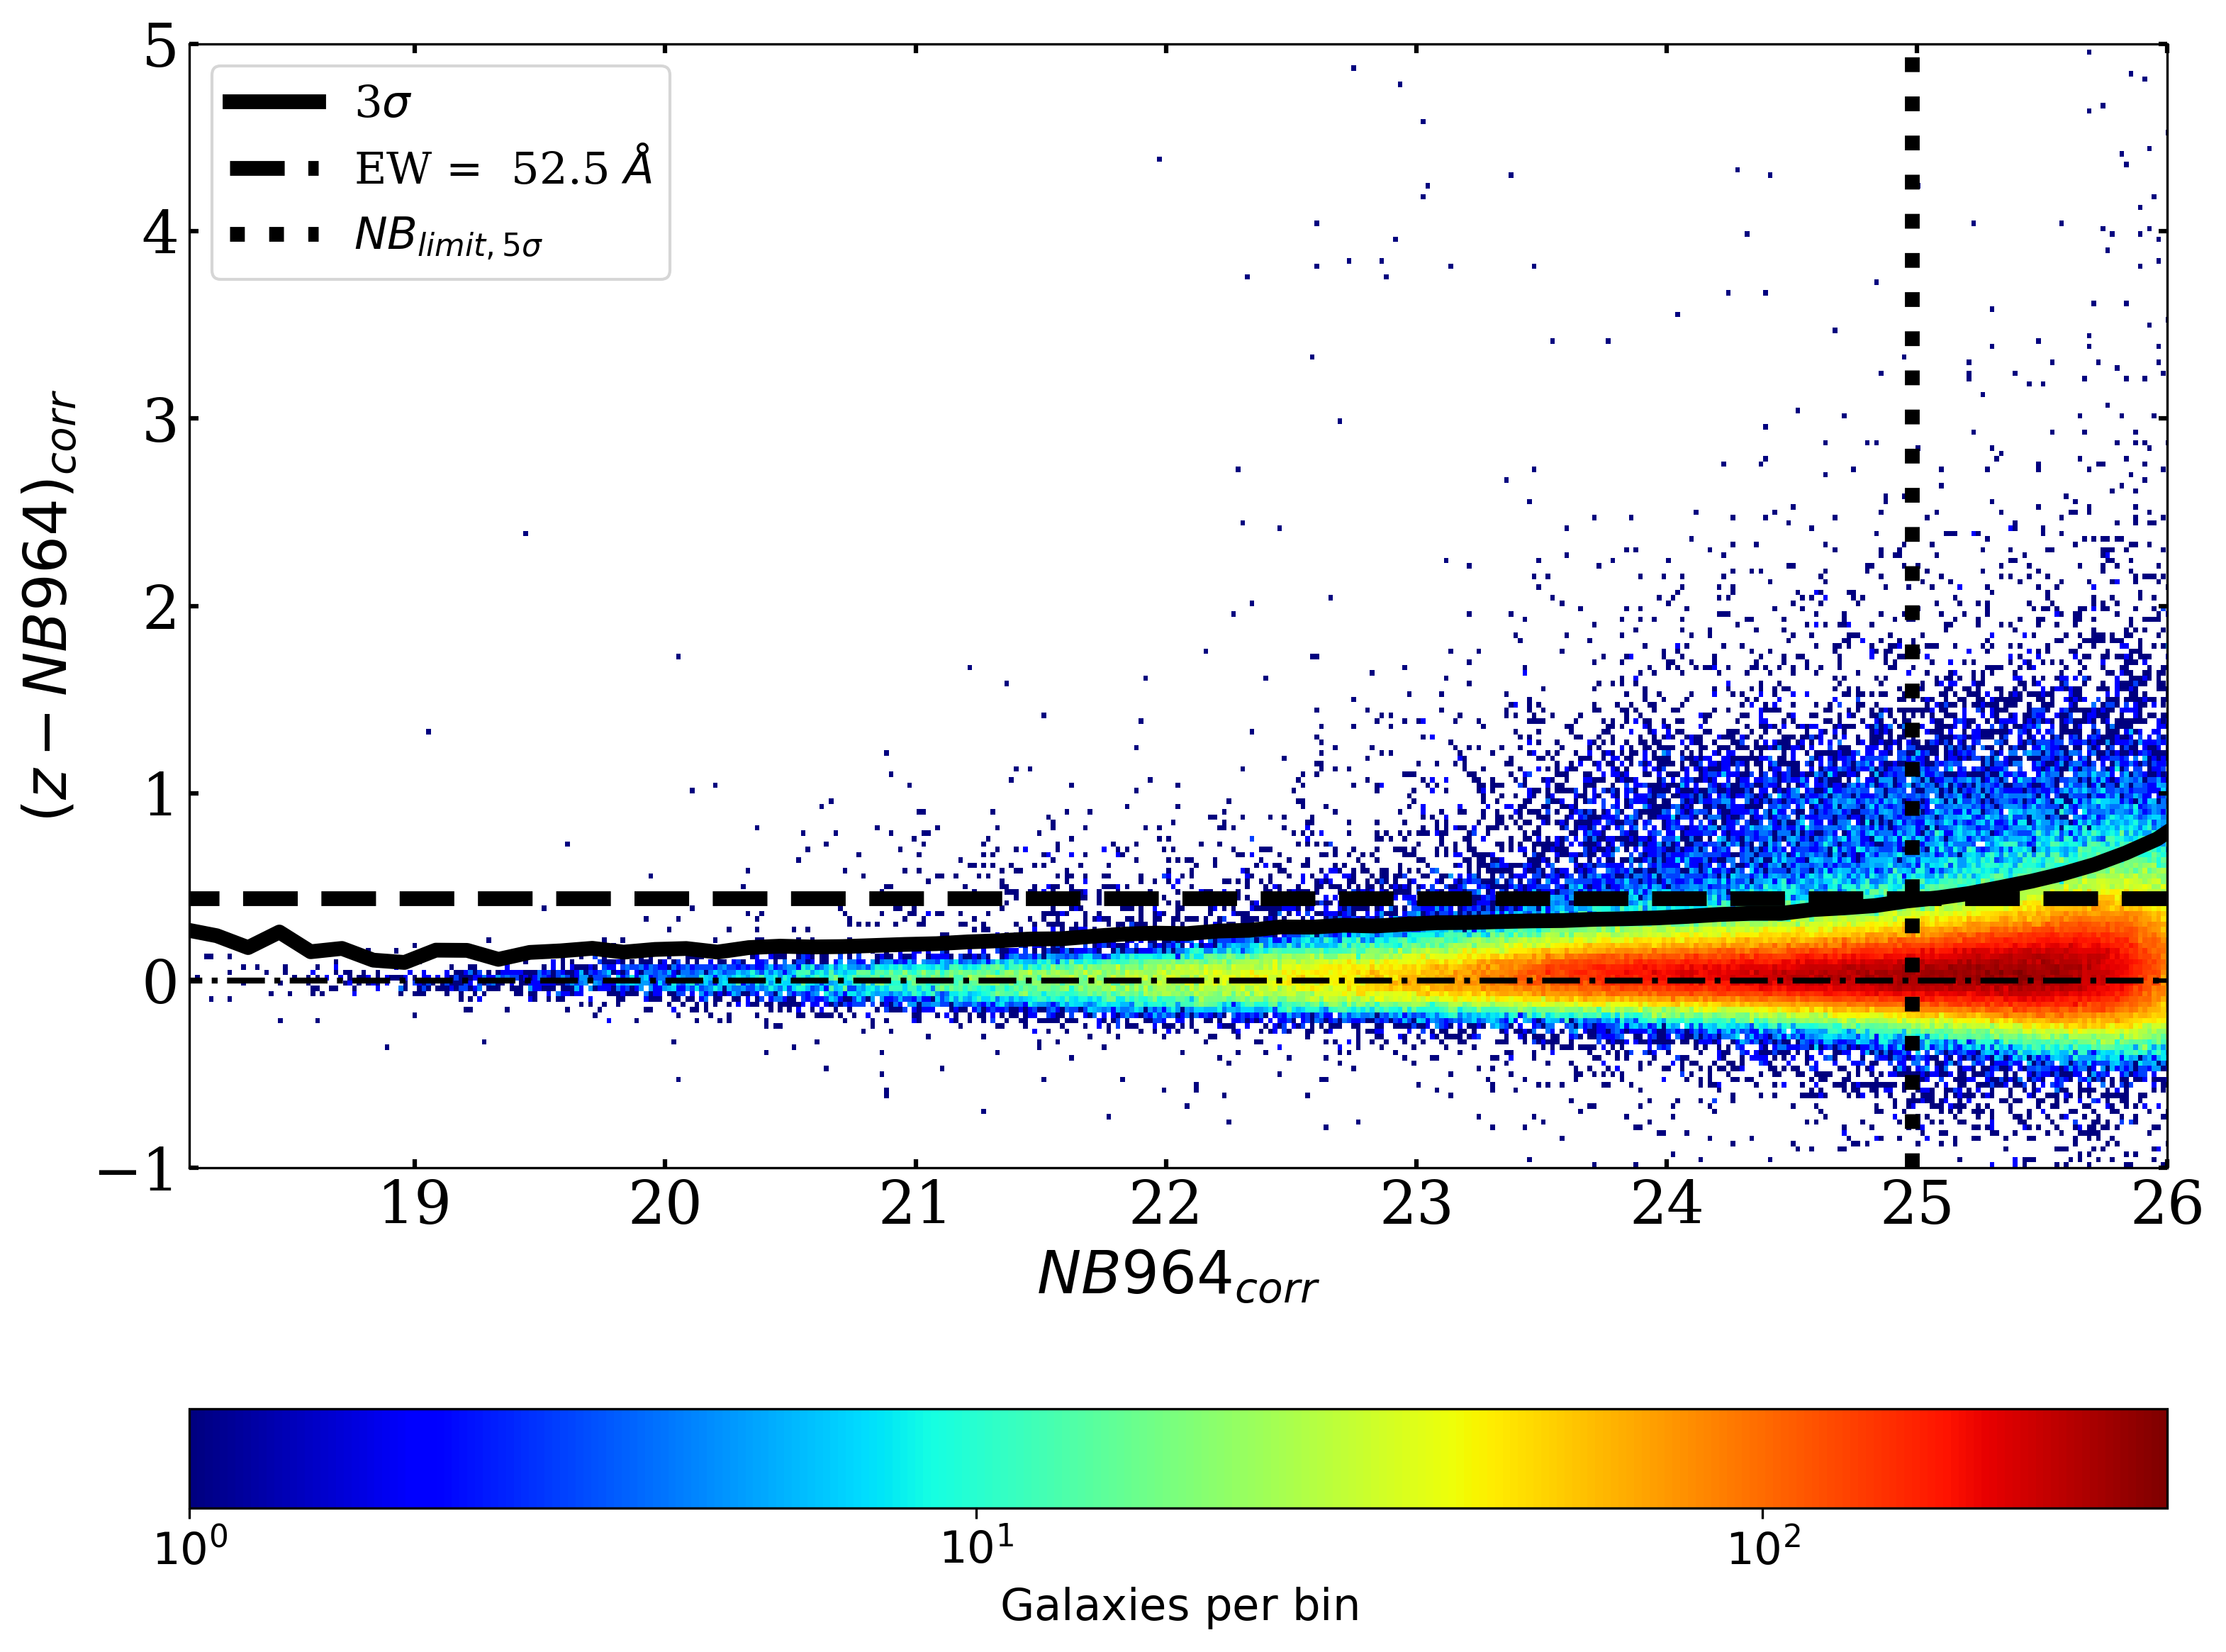

In [72]:
cmap = plt.cm.jet
cmap.set_bad('w', 1.)

cmap_multicolor = plt.cm.jet
cmap_multicolor.set_bad('w', 1.)

fig = plt.figure(figsize=(12, 10), dpi = 300)
#--------------------
# First axes:
plt.imshow(np.log10(N.T), origin='lower',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='auto', interpolation='nearest', cmap='jet')


cb = plt.colorbar(ticks=[0, 1, 2, 3],
                  format=r'$10^{%i}$', orientation='horizontal')
cb.set_label(r'$\mathrm{Galaxies\ per\ bin}$', size = 15)


#ax.hlines(0,18,27, linestyle='dotted', color ='hotpink')
plt.hlines(ew_end,18,27, linestyle='dashed', color ='k', linewidth = 5, label = r'EW =  52.5 $\AA$')
plt.hlines(0,18,27, linestyle='-.', color ='k', linewidth = 2)
plt.vlines(NB_5s,-1,5, linestyle='dotted', color ='k', linewidth = 5, label = r'$NB_{limit,5\sigma}$')
plt.plot(numbers,sig_clip, color = 'k', linewidth = 5, label = '3$\sigma$')

plt.ylabel(r'$(z - NB964)_{corr}$')
plt.xlabel(r'$NB964_{corr}$')

#plt.major_locator(ticker.MultipleLocator(1))      # Ticks principales cada 1 unidades en el eje x
#plt.minor_locator(ticker.MultipleLocator(0.5))    # Ticks secundarios cada 0.1 unidades en el eje x
#plt.major_locator(ticker.MultipleLocator(0.25))      # Ticks principales cada 1 unidades en el eje y
#plt.minor_locator(ticker.MultipleLocator(0.05))    # Ticks secundarios cada 0.5 unidades en el eje y
plt.tick_params(axis='x', which='both', bottom=True, top=True, direction='in', length=6)   # Ticks en el eje x en la parte inferior y superior
plt.tick_params(axis='x', which='minor', bottom=True, top=True, direction='in', length=3)
plt.tick_params(axis='y', which='both', left=True, right=True, direction='in', length=6)   # Ticks en el eje y en el lado izquierdo y derecho
plt.tick_params(axis='y', which='minor', bottom=True, top=True, direction='in', length=3)



plt.tick_params(direction = 'in', length = 3, width = 1.5, colors = 'k', labelsize = 20)
plt.legend(loc = 2)
plt.xlim(18.1,26) 
plt.ylim(-1,5)
plt.show()

In [55]:
print(len(yedges))

701


In [56]:
# mask_select = (NB_corr < NB_5s) & ((BB-NB_corr) > ew_end)
# data_elg = data[mask_select]

In [57]:
mask= (NB_corr < NB_5s) & ((BB-NB_corr) > ew_end)
#mask2 = ((BB-NB_corr) > ew_end)
data_elg = data[mask]

In [58]:
data_elg

<Table length=7779>
NUMBER  FLUX_ISO FLUXERR_ISO ... MAGERR_AUTO_y BACKGROUND_y     MAG_AUTO_y    
int32   float32    float32   ...    float32      float32         float64      
------ --------- ----------- ... ------------- ------------ ------------------
  4018 15.009581   1.4183387 ...    0.32532212  -0.10080591  24.60376636021069
  4034 27.845892   1.8776053 ...   0.120100416   0.29706973 22.789980807232176
  4084 11.729815   1.0604223 ...    0.11101234  -0.16319758  23.98144999973706
  4126 19.115555   1.5626724 ...     0.2144426 -0.116032355 23.932850756572996
  4175 22.564192   1.5172069 ...    0.12102858  -0.12361713 23.254193224834715
  4178 25.464865   1.5595572 ...    0.38078555 0.0148056485 24.668778338360106
  4210   8.55499   1.0627733 ...    0.28075427  -0.07195076 24.578535952495848
  4225  16.57316   1.3758607 ...    0.16559558  -0.09987262 24.116883196758543
  4318 30.390625   1.7655902 ...    0.13047934  -0.08111025 23.226223864483153
  4387 47.460045   2.1564226 ...    0.10110284  -0.13055313 22.756491579937254
   ...       ...         ... ...           ...          ...                ...
547150 22.622843   3.5999975 ...          99.0  -0.03704027  98.99073497288158
547160 12.832313   2.9241457 ...    0.10819363    0.8875868 23.032891192364012
547162 16.671518   3.4416928 ...          99.0  -0.05661239  98.99073497288158
547163  11.63113    2.871348 ...    0.04615095   0.85712314 21.702013888286864
547165  27.59836   3.7186506 ...          99.0  0.026698163  98.99073497288158
547172 46.210243     3.43596 ...     0.6364022   0.29405934 24.161604800152098
547175    67.637    6.032095 ...          99.0 -0.013951088  98.99073497288158
547180 58.288612    6.364435 ...   0.007066785   0.84746736 19.348647036480223
547187 42.805534    4.478791 ...    0.10094655   0.42860475 22.704640307354246
547200 128.76851    5.464305 ...          99.0   0.03696568  98.99073497288158

In [59]:
BB_s = np.array([data_elg['MAG_APER_z'][i][aper] for i in range(len(data_elg))]) 


NB_s = np.array([data_elg['MAG_APER'][i][aper] for i in range(len(data_elg))]) 

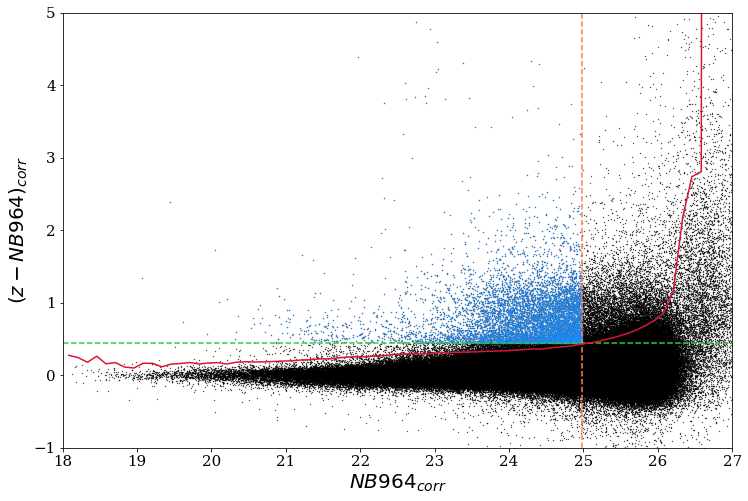

In [60]:
fig, ax= plt.subplots(figsize =(12,8))


#ax.scatter(NB_corr, -(BB-NB_corr), s =1, color ='slategray')
ax.scatter(NB_corr, BB-NB_corr, s =0.1, color ='k')
#ax.scatter(np.array(Narrowb), np.array(Broadb)-np.array(Narrowb), s =1, color ='royalblue')
#ax.plot(mags[:-numb], sigma_c, color = 'crimson',alpha =0.8)
# ax.scatter(NB_cc,BB_cc-NB_cc,s=1)
ax.plot(numbers,sig_clip, color = 'crimson')
ax.scatter(NB_s, BB_s-NB_s, color = 'dodgerblue', s =0.1)
#.plot(numbers,cs_crit, color = 'cyan')
ax.set_xlim(18,27) 
ax.set_ylim(-1,5)
ax.set_ylabel(r'$(z - NB964)_{corr}$')
ax.set_xlabel(r'$NB964_{corr}$')
#ax.hlines(0,18,27, linestyle='dotted', color ='hotpink')
ax.hlines(ew_end,18,27, linestyle='dashed', color ='limegreen')
ax.vlines(NB_5s,-1,5, linestyle='dashed', color ='coral')
plt.show()

In [61]:
RA = data_elg['ALPHA_J2000']
DEC = data_elg['DELTA_J2000']

In [62]:
cut1 = (RA > 318.25) & (DEC < -66.9) 
cut2 = (RA > 318.65) & (DEC < -66.7)
cut3 = (RA > 319.10) & (DEC < -66.55)
cut4 = (RA > 319.40) & (DEC < -66.2)

cut5 = (RA > 316.68) & (RA < 316.75) & (DEC < -66.9)
cut6 = (RA < 315.734) & (DEC < -66.84)
cut7 = (RA < 314.24) & (DEC < -66)
cut8 = (RA < 314.4) & (DEC < -66.20)

In [63]:
data_selected = data_elg[~cut1 & ~cut2 & ~cut3 & ~cut4 & ~cut5 & ~cut6 & ~cut7 & ~cut8]

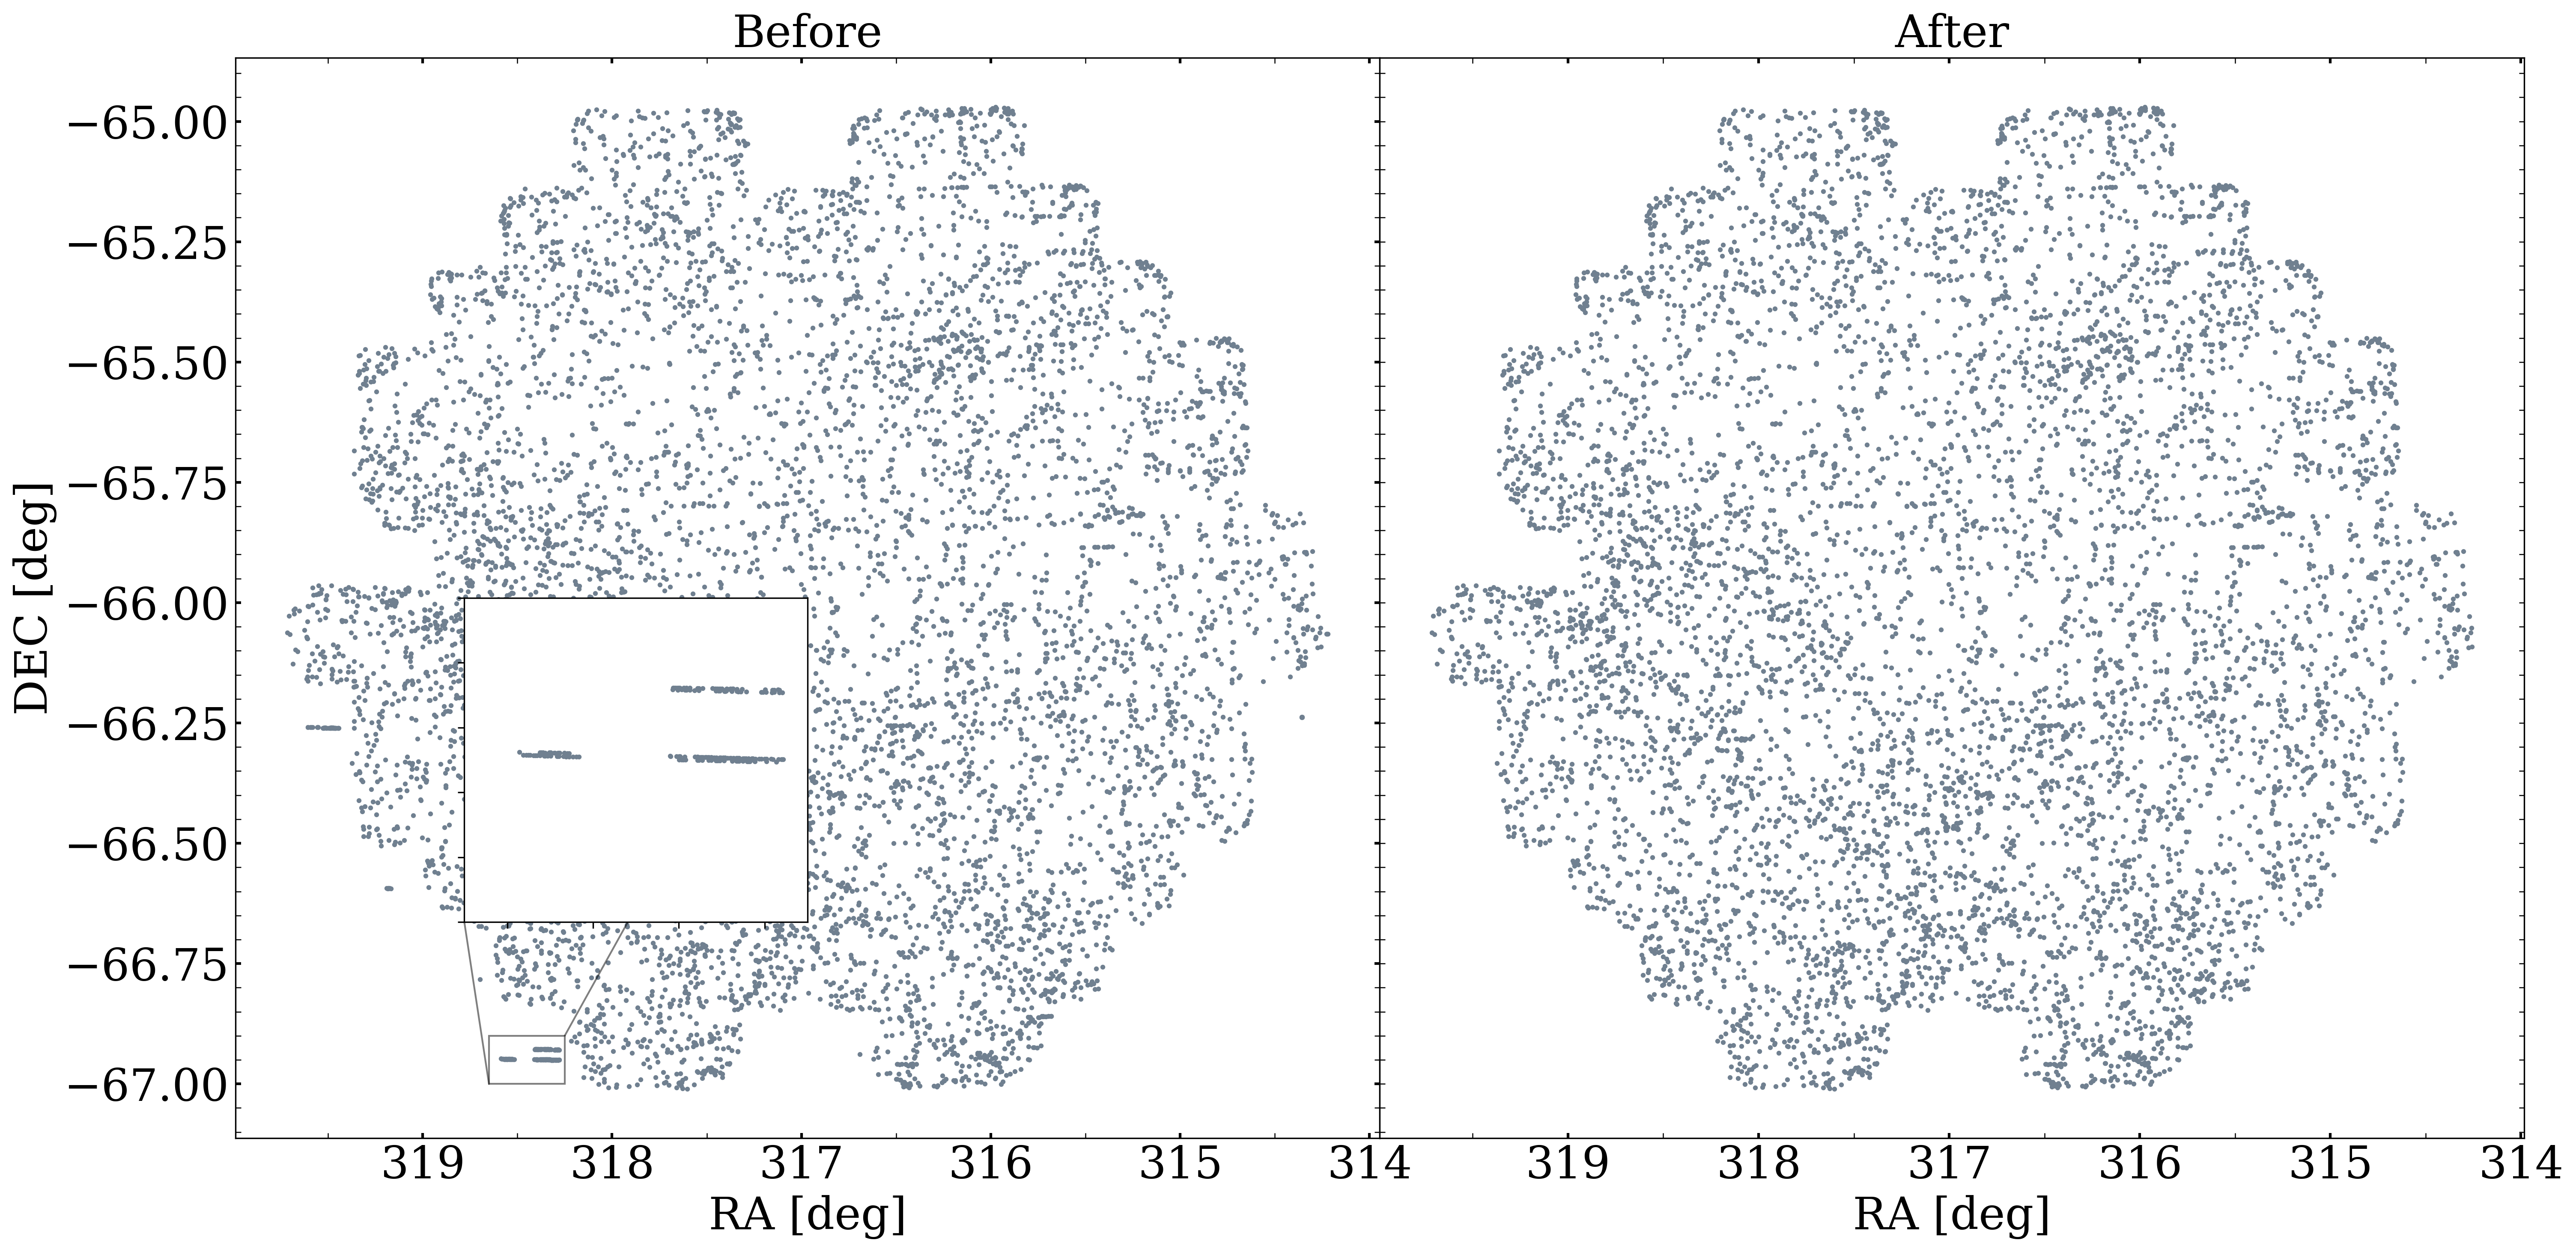

In [64]:
fig, ax = plt.subplots(ncols=2, nrows = 1,figsize=(20, 10), dpi = 300)
ax[0].scatter(data_elg['ALPHA_J2000'],data_elg['DELTA_J2000'], s =3, c = 'slategray')
ax[1].scatter(data_selected['ALPHA_J2000'],data_selected['DELTA_J2000'], s =3, c = 'slategray')

ax[0].xaxis.set_major_locator(ticker.MultipleLocator(1))      # Ticks principales cada 1 unidades en el eje x
ax[0].xaxis.set_minor_locator(ticker.MultipleLocator(0.5))    # Ticks secundarios cada 0.1 unidades en el eje x
ax[0].yaxis.set_major_locator(ticker.MultipleLocator(0.25))      # Ticks principales cada 1 unidades en el eje y
ax[0].yaxis.set_minor_locator(ticker.MultipleLocator(0.05))    # Ticks secundarios cada 0.5 unidades en el eje y
ax[0].tick_params(axis='x', which='both', bottom=True, top=True, direction='in', length=6)   # Ticks en el eje x en la parte inferior y superior
ax[0].tick_params(axis='x', which='minor', bottom=True, top=True, direction='in', length=3)
ax[0].tick_params(axis='y', which='both', left=True, right=True, direction='in', length=6)   # Ticks en el eje y en el lado izquierdo y derecho
ax[0].tick_params(axis='y', which='minor', left=True, right=True, direction='in', length=3)

ax[1].xaxis.set_major_locator(ticker.MultipleLocator(1))      # Ticks principales cada 1 unidades en el eje x
ax[1].xaxis.set_minor_locator(ticker.MultipleLocator(0.5))    # Ticks secundarios cada 0.1 unidades en el eje x
ax[1].yaxis.set_major_locator(ticker.MultipleLocator(0.25))      # Ticks principales cada 1 unidades en el eje y
ax[1].yaxis.set_minor_locator(ticker.MultipleLocator(0.05))    # Ticks secundarios cada 0.5 unidades en el eje y
ax[1].tick_params(axis='x', which='both', bottom=True, top=True, direction='in', length=6)   # Ticks en el eje x en la parte inferior y superior
ax[1].tick_params(axis='x', which='minor', bottom=True, top=True, direction='in', length=3)
ax[1].tick_params(axis='y', which='both', left=True, right=True, direction='in', length=6)   # Ticks en el eje y en el lado izquierdo y derecho
ax[1].tick_params(axis='y', which='minor', left=True, right=True, direction='in', length=3)

# inset axes....
axins = ax[0].inset_axes([0.2, 0.2, 0.3, 0.3])
axins.scatter(data_elg['ALPHA_J2000'],data_elg['DELTA_J2000'], s =3, c = 'slategray')
# subregion of the original image
x1, x2, y1, y2 = 318.25, 318.65, -67, -66.9
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])
axins.invert_xaxis()

ax[0].indicate_inset_zoom(axins, edgecolor="black")

ax[0].set_title('Before', size = 25)
ax[1].set_title('After', size = 25)
ax[1].set_yticks([])
ax[1].set_ylabel('')

ax[0].tick_params(direction = 'in', length = 3, width = 1.5, colors = 'k', labelsize = 25)
ax[1].tick_params(direction = 'in', length = 3, width = 1.5, colors = 'k', labelsize = 25)

ax[0].set_ylabel('DEC [deg]', size = 25)
ax[0].set_xlabel('RA [deg]', size = 25)
ax[1].set_xlabel('RA [deg]', size = 25)
fig.tight_layout()    
plt.subplots_adjust(wspace=0)

ax[0].invert_xaxis()
ax[1].invert_xaxis()

plt.show()

In [65]:
data_selected

<Table length=7538>
NUMBER  FLUX_ISO FLUXERR_ISO ... MAGERR_AUTO_y BACKGROUND_y     MAG_AUTO_y    
int32   float32    float32   ...    float32      float32         float64      
------ --------- ----------- ... ------------- ------------ ------------------
  4018 15.009581   1.4183387 ...    0.32532212  -0.10080591  24.60376636021069
  4034 27.845892   1.8776053 ...   0.120100416   0.29706973 22.789980807232176
  4084 11.729815   1.0604223 ...    0.11101234  -0.16319758  23.98144999973706
  4126 19.115555   1.5626724 ...     0.2144426 -0.116032355 23.932850756572996
  4175 22.564192   1.5172069 ...    0.12102858  -0.12361713 23.254193224834715
  4178 25.464865   1.5595572 ...    0.38078555 0.0148056485 24.668778338360106
  4210   8.55499   1.0627733 ...    0.28075427  -0.07195076 24.578535952495848
  4225  16.57316   1.3758607 ...    0.16559558  -0.09987262 24.116883196758543
  4318 30.390625   1.7655902 ...    0.13047934  -0.08111025 23.226223864483153
  4387 47.460045   2.1564226 ...    0.10110284  -0.13055313 22.756491579937254
   ...       ...         ... ...           ...          ...                ...
547150 22.622843   3.5999975 ...          99.0  -0.03704027  98.99073497288158
547160 12.832313   2.9241457 ...    0.10819363    0.8875868 23.032891192364012
547162 16.671518   3.4416928 ...          99.0  -0.05661239  98.99073497288158
547163  11.63113    2.871348 ...    0.04615095   0.85712314 21.702013888286864
547165  27.59836   3.7186506 ...          99.0  0.026698163  98.99073497288158
547172 46.210243     3.43596 ...     0.6364022   0.29405934 24.161604800152098
547175    67.637    6.032095 ...          99.0 -0.013951088  98.99073497288158
547180 58.288612    6.364435 ...   0.007066785   0.84746736 19.348647036480223
547187 42.805534    4.478791 ...    0.10094655   0.42860475 22.704640307354246
547200 128.76851    5.464305 ...          99.0   0.03696568  98.99073497288158

In [66]:
data_selected.write('NSF_ELG_z.fits', format='fits', overwrite = True)